<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MHA_P4_(extra)_1s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas A - P4 (extra) - 1S2024

## Enunciado

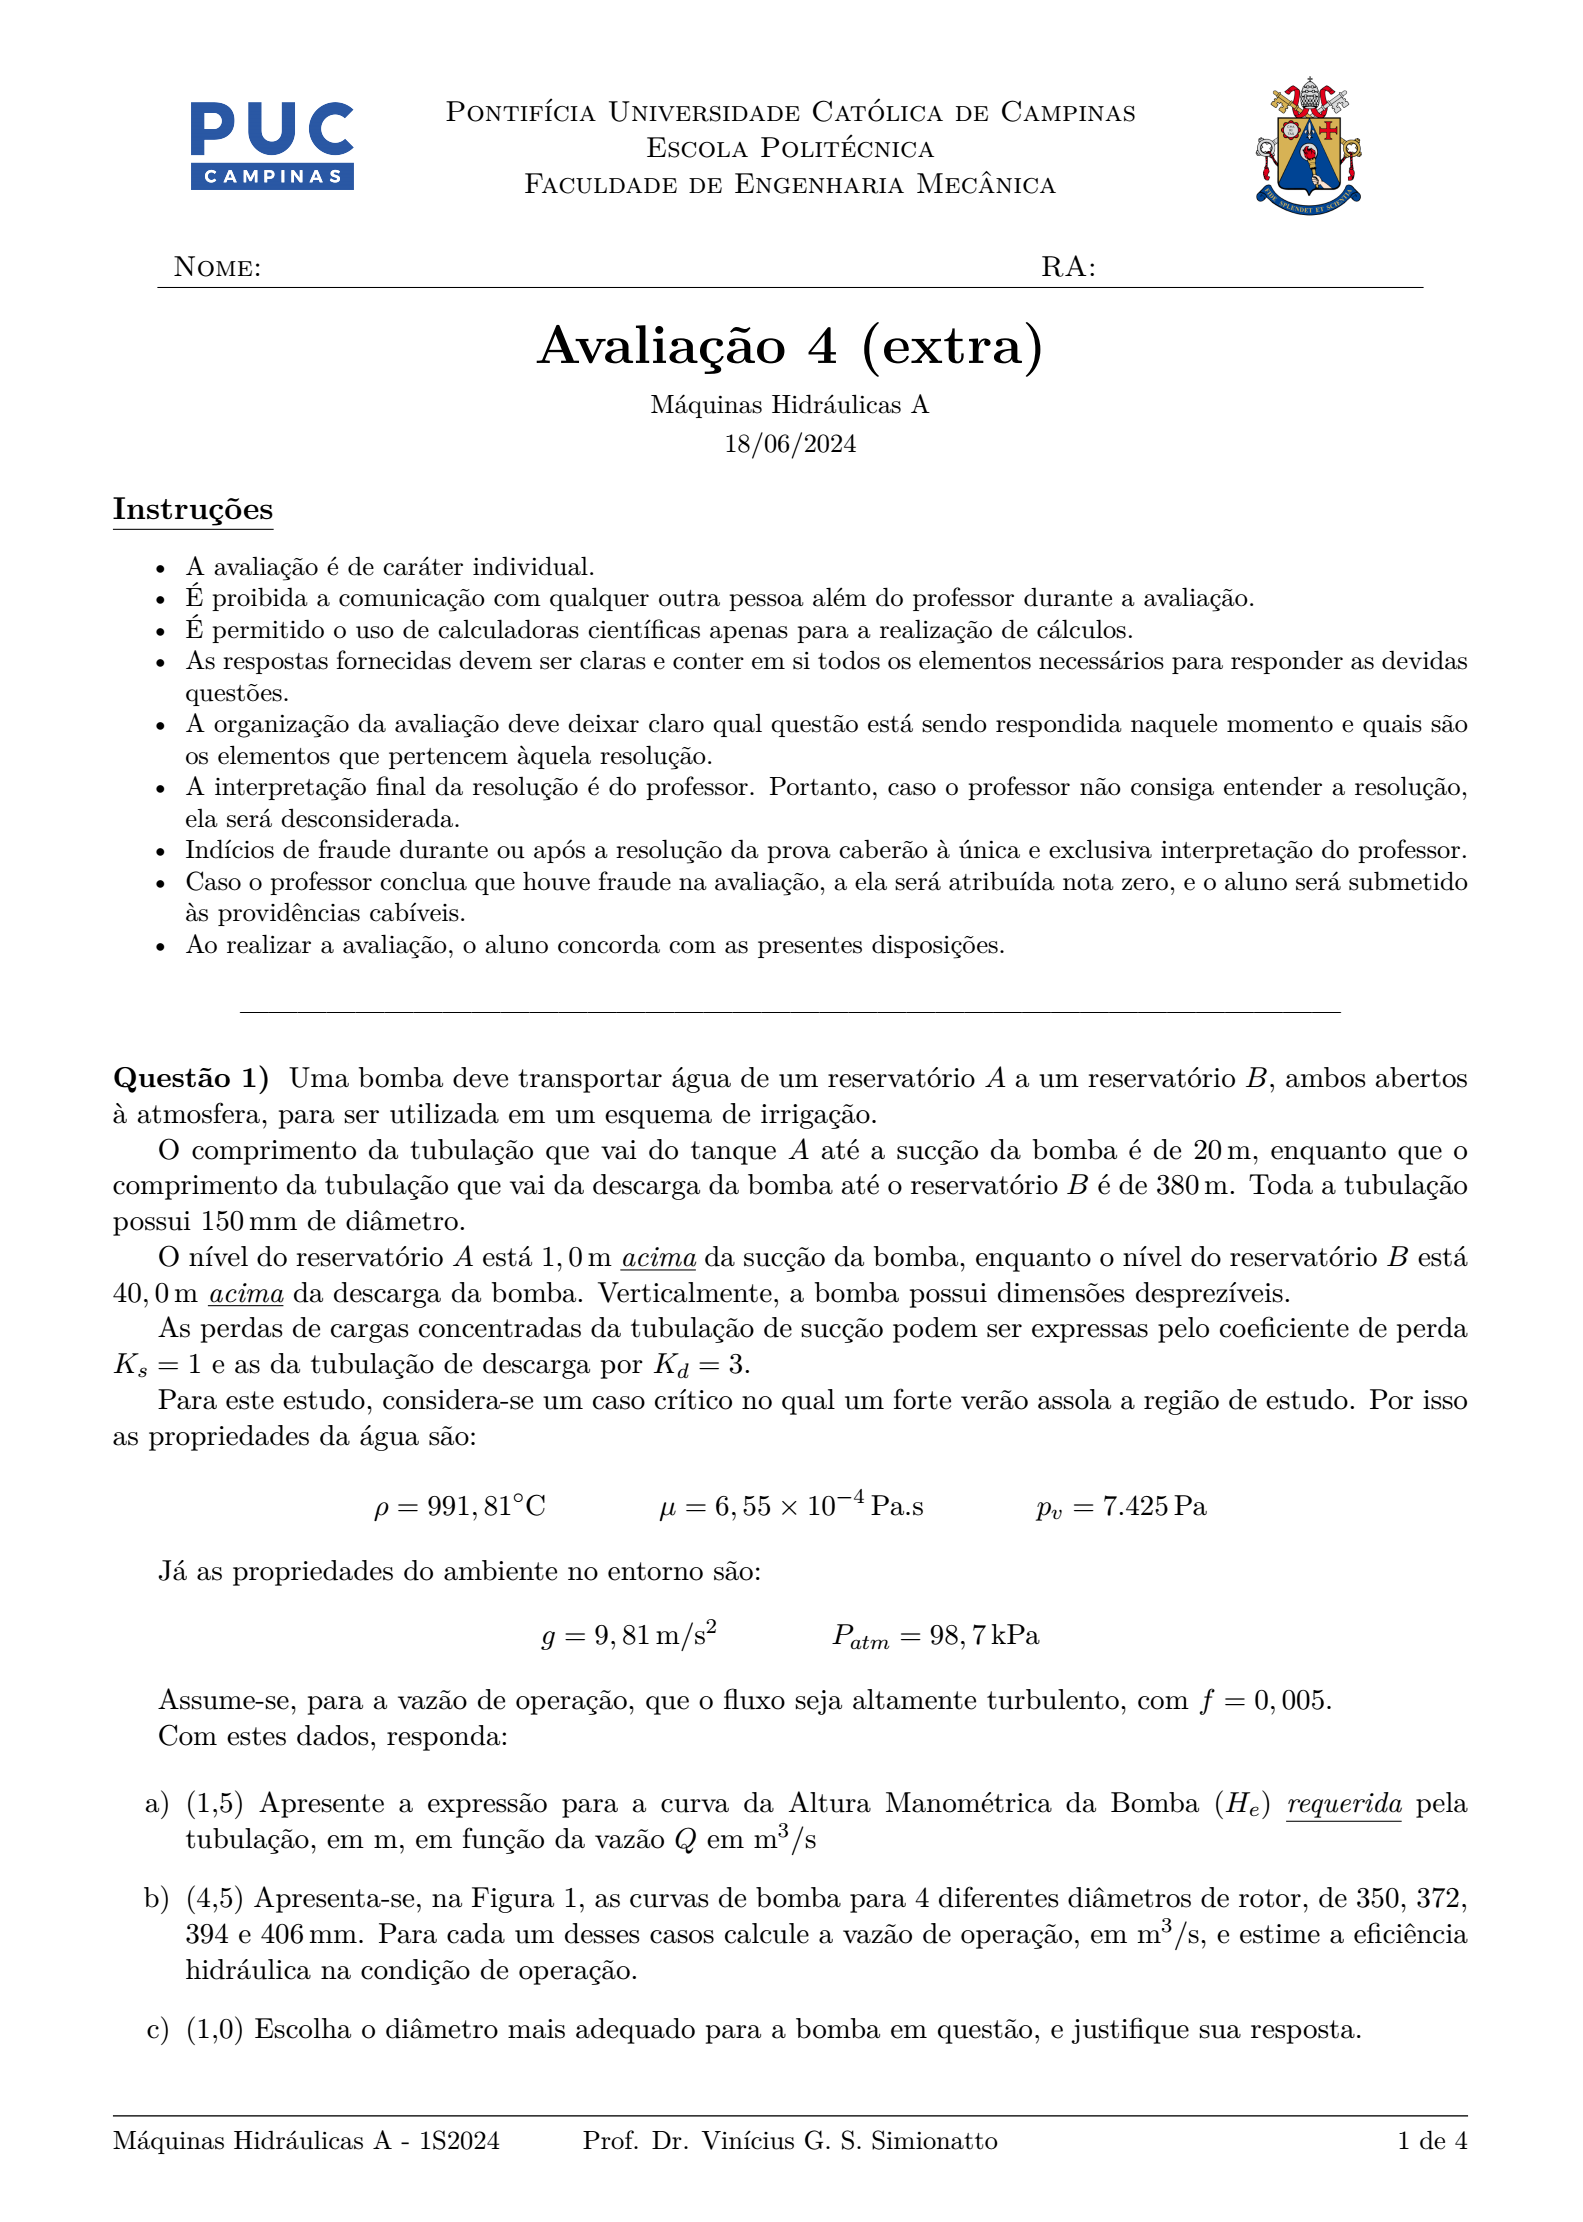

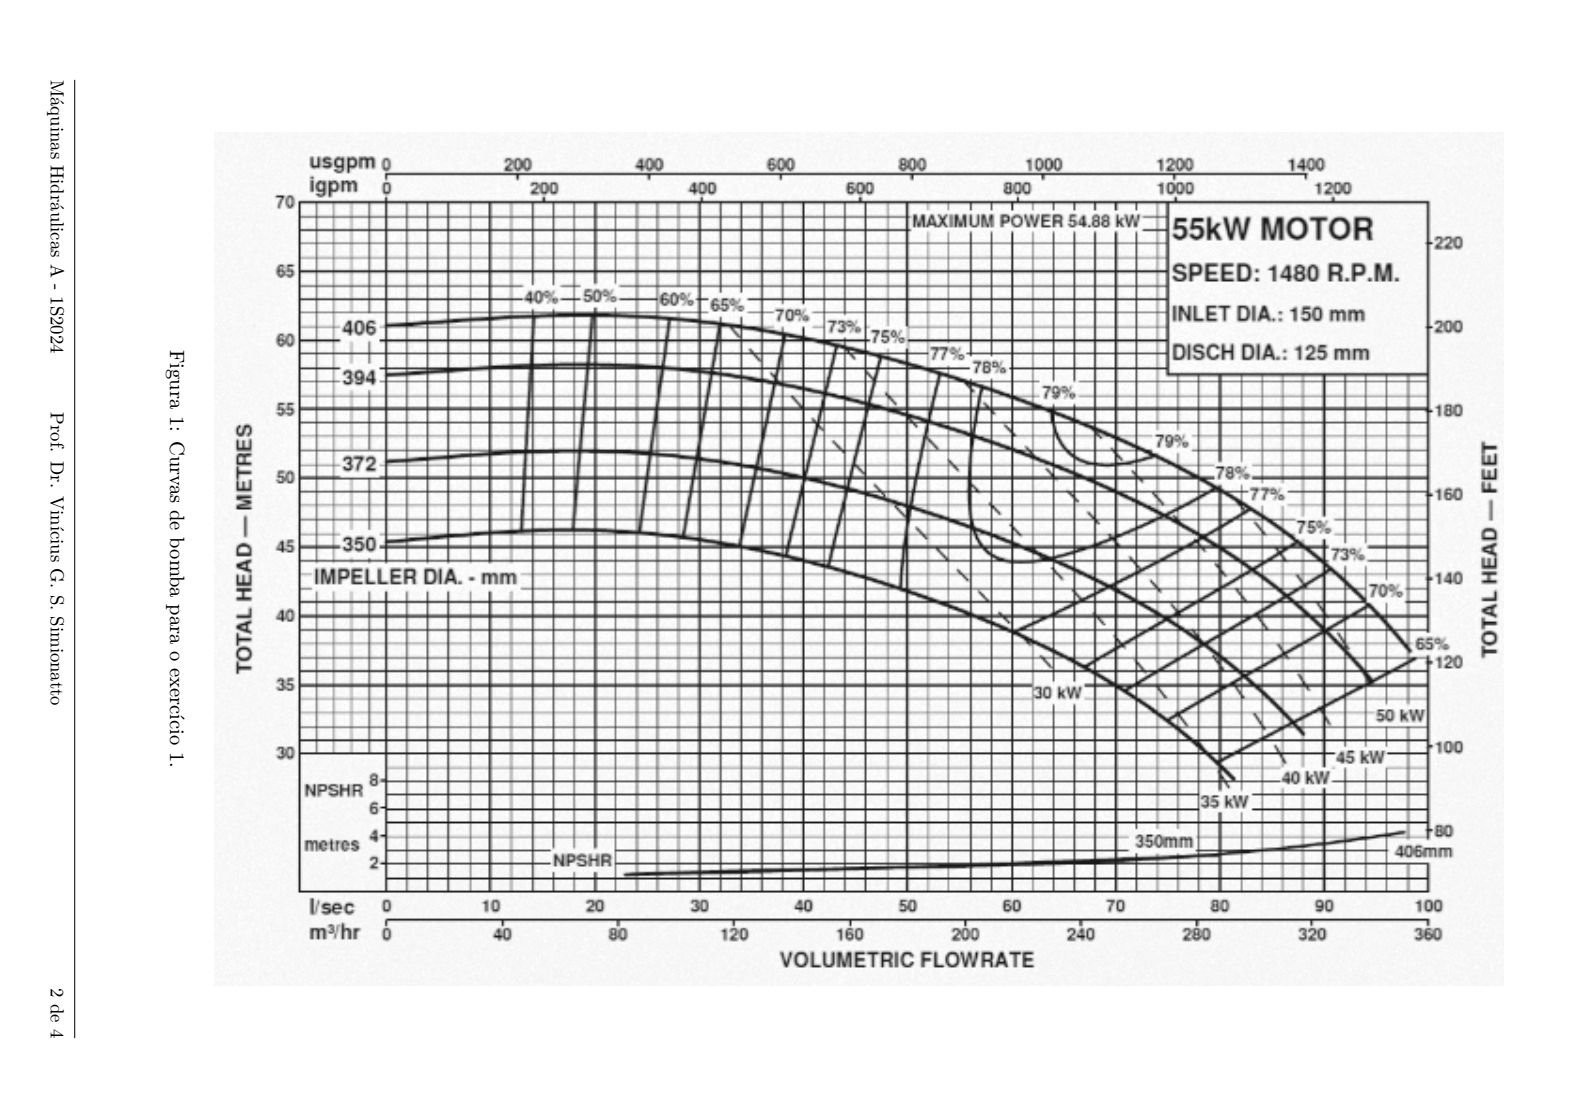

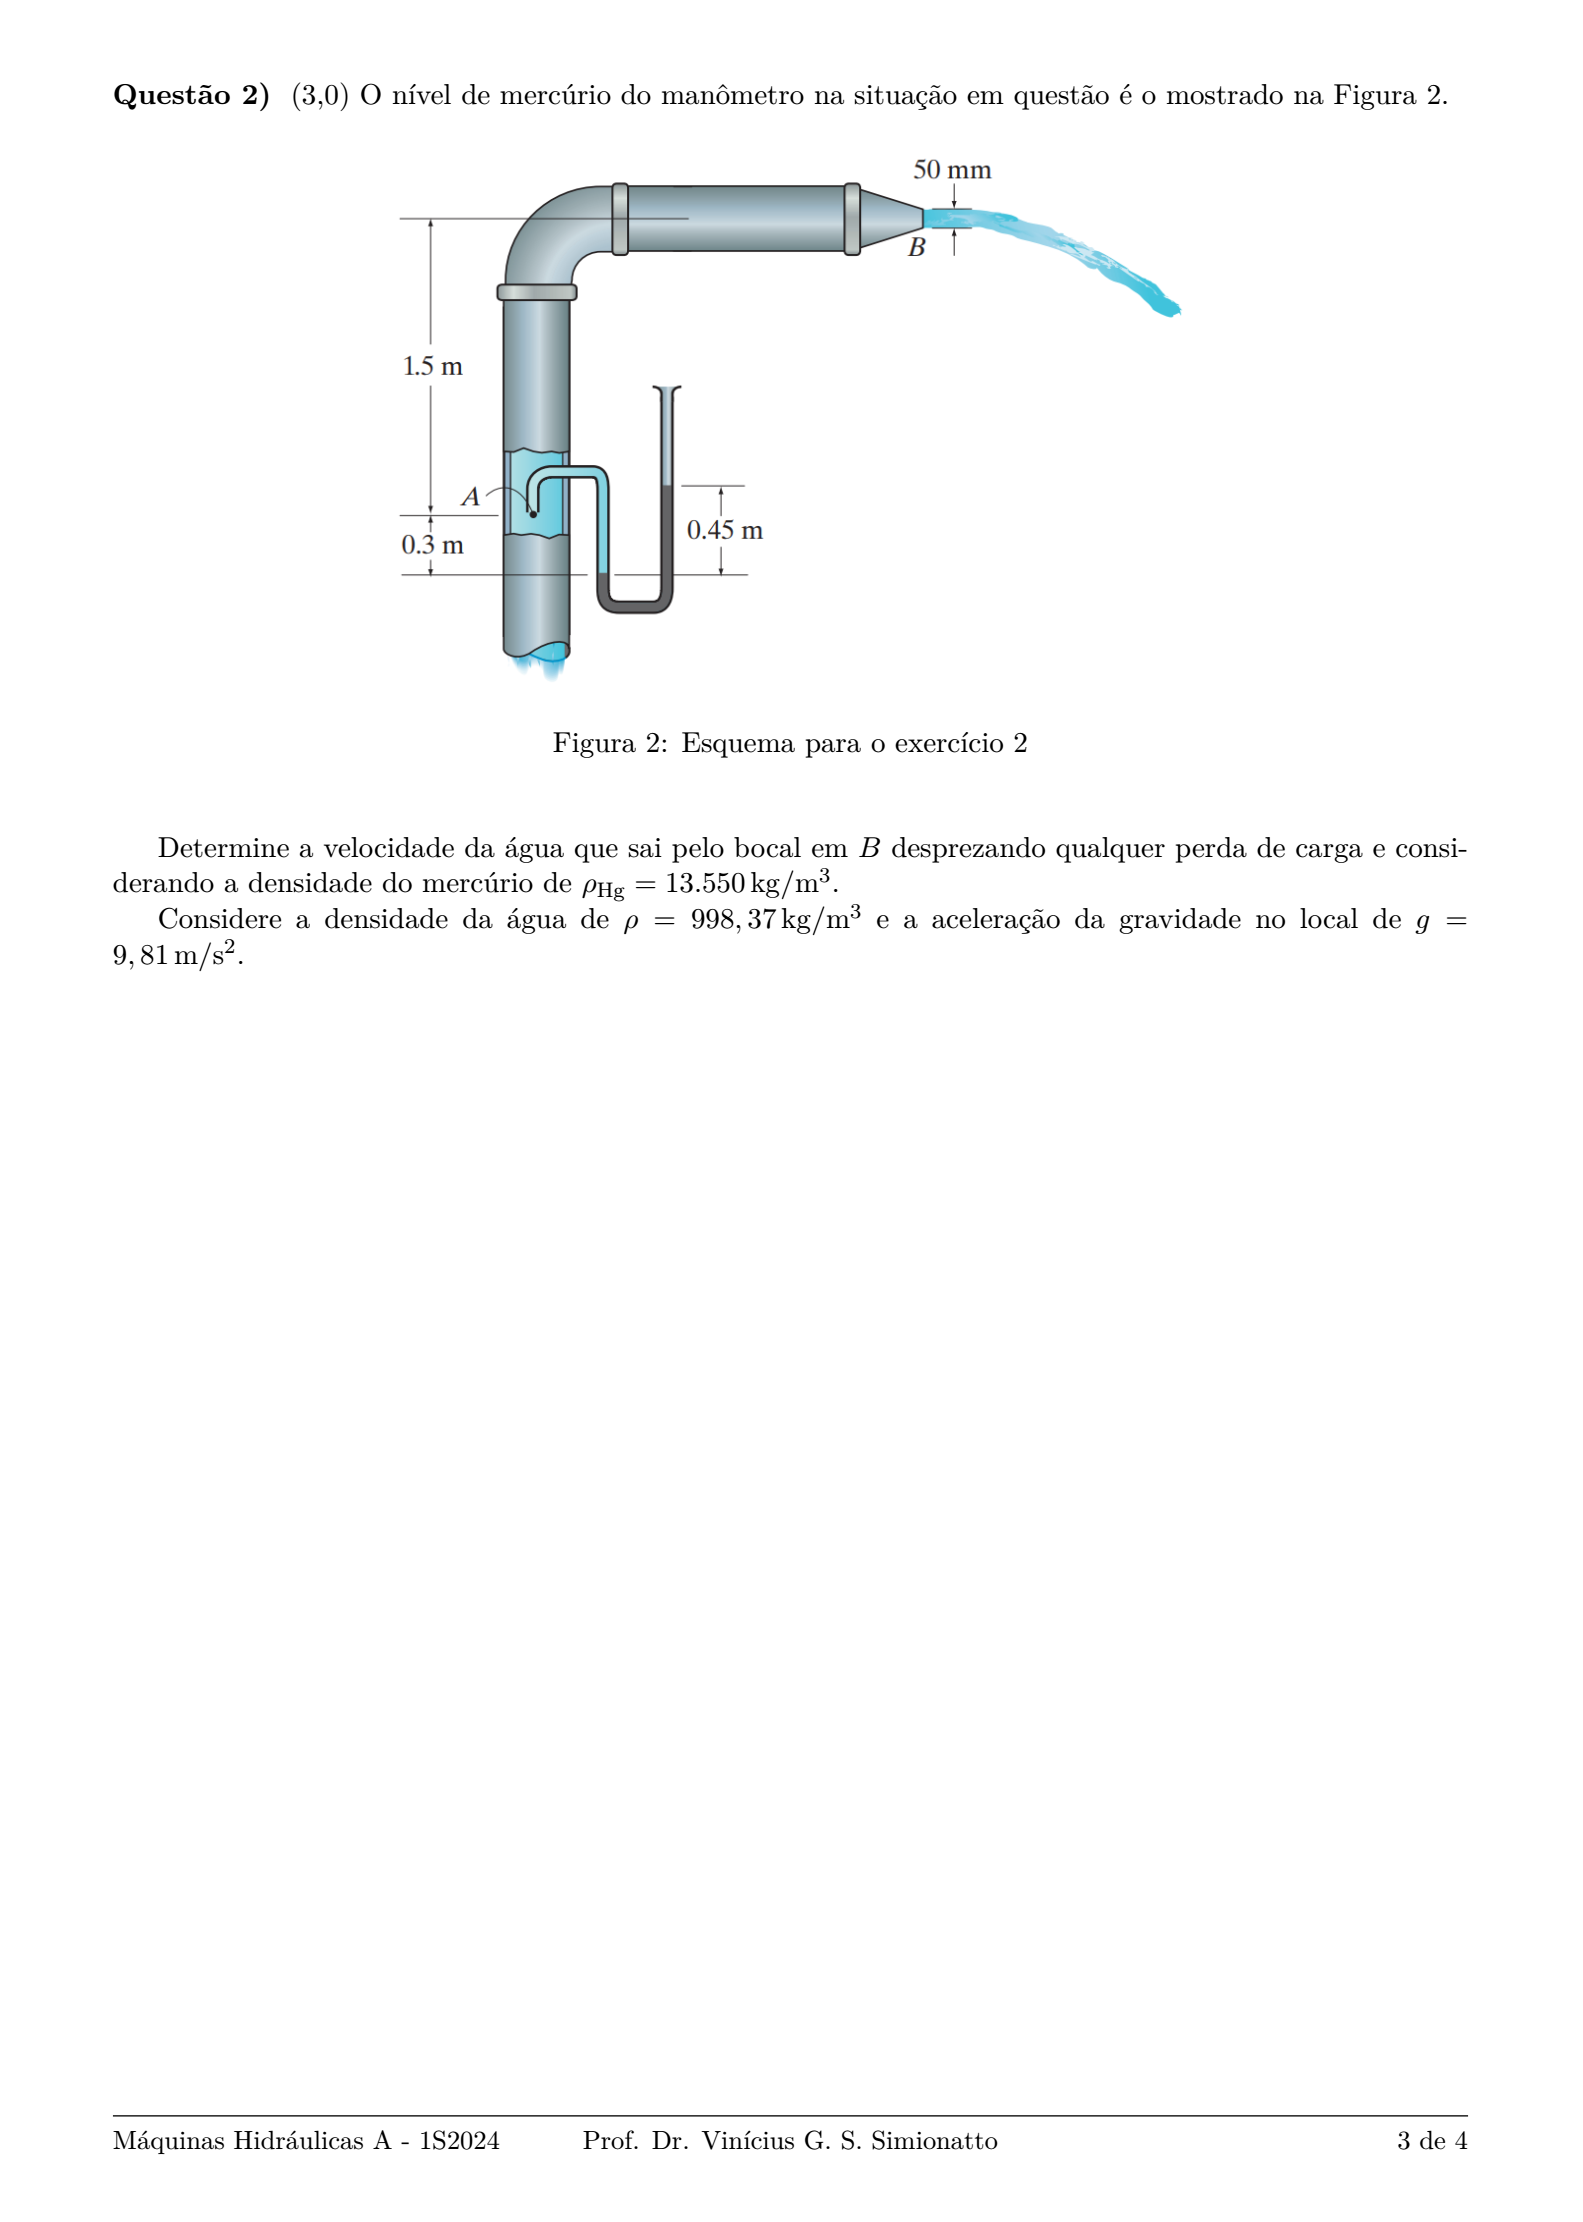

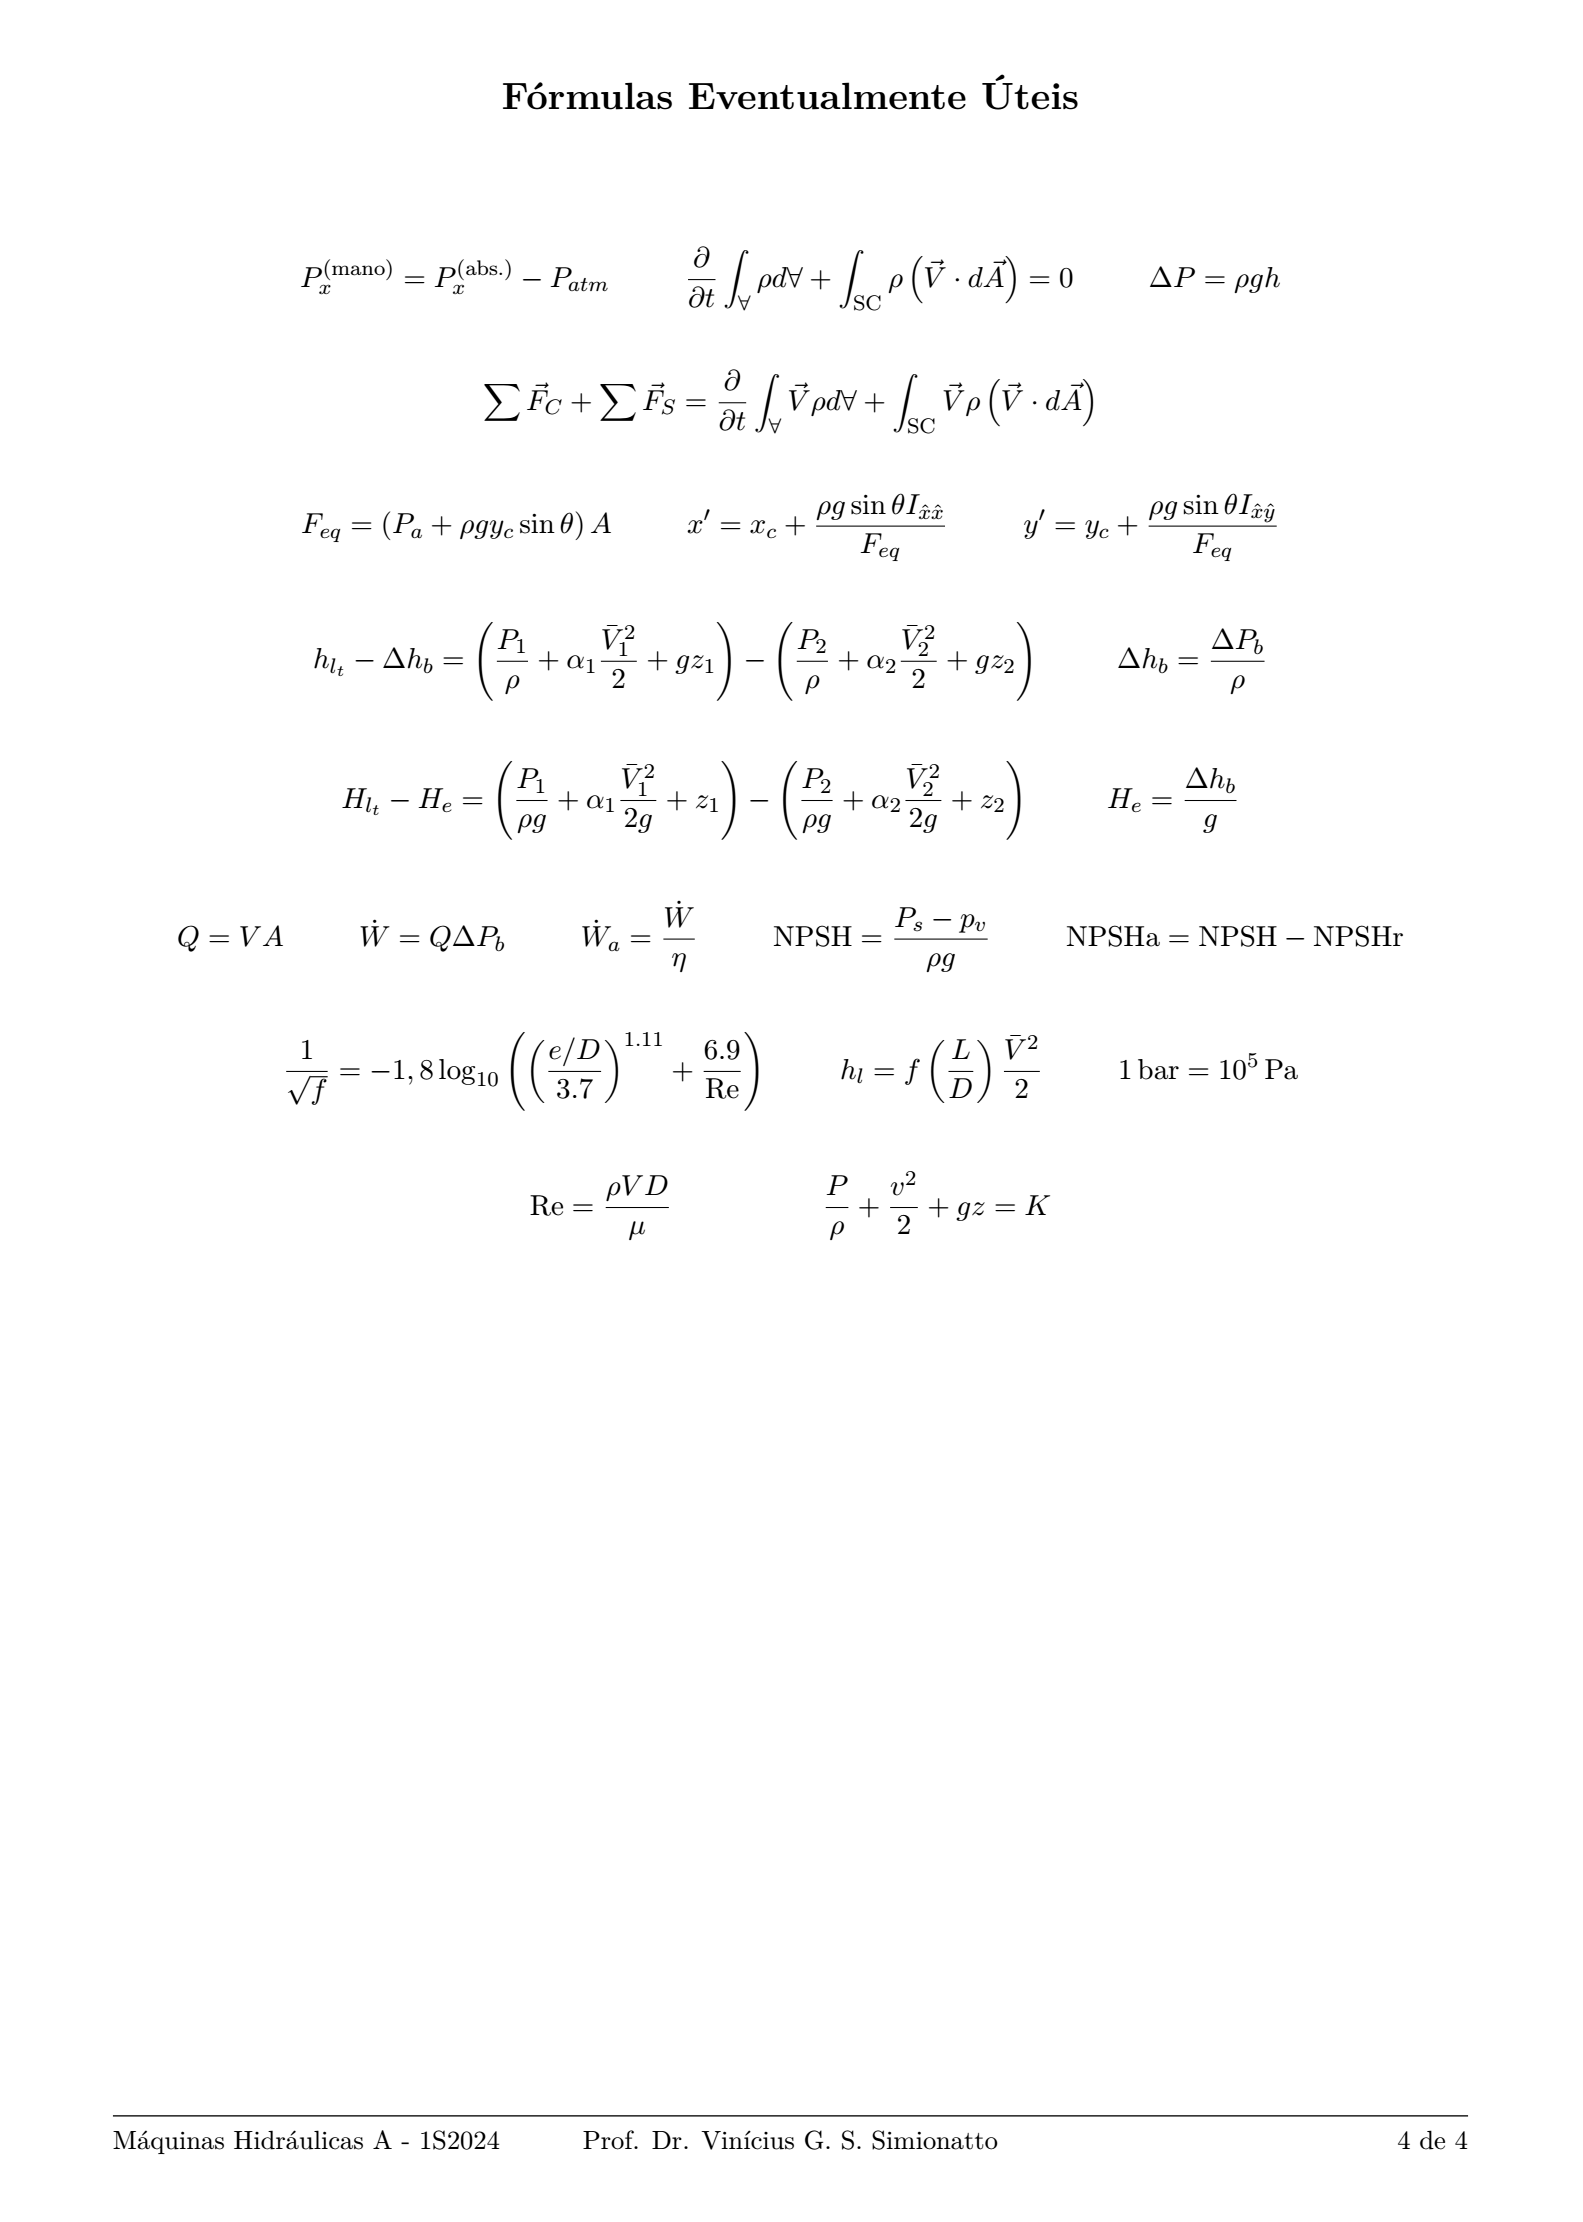

## Solução

### Questão 1 a)

Para calcular a vazão manométrica requerida, basta calcular o termo $H_e$ diretamente da fórmula:

$$
H_{lt} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right)
$$

A partir dos dados do enunciado, pode-se avaliar o sistema colocando o ponto 1 o nível do reservatório de sucção e o 2 no nível do reservatório de descarga. Tomando o nível do reservatório 1 como referência de elevação:

*   $P_1 = P_2 = P_{atm}$
*   $\bar{V}_1 = \bar{V}_2 = 0$
*   $z_1 = 0$
*   $z_2 = h = 39\,\mathrm{m}$

Assim, a equação se torna:
$$
H_e = H_{lt} + h
$$

A equação da perda de carga deve englobar as perdas de carga da tubulação e da descarga. Assim:

$$
H_{lt} = f\left(\frac{L_s}{D}\right) \frac{V^2}{2g} + K_s \frac{V^2}{2g} + f\left(\frac{L_d}{D}\right) \frac{V^2}{2g} + K_d \frac{V^2}{2g}
$$

Ou seja:
$$
H_{lt} = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{V^2}{2g}
$$

Ou em função da vazão:
$$
H_{lt} = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{Q^2}{2gA^2}
$$

Finalmente, temos:
$$
H_e = \left(f\left(\frac{L_s+L_d}{D}\right) + K_s + K_d\right) \frac{Q^2}{2gA^2} + h = \phi Q^2 + h
$$

A expressão com os valores numéricos substituídos é mostrada a seguir:

In [ ]:
from numpy import pi

# Dados:

rho = 991.81   # kg/m³
mu = 6.55e-4   # Pa.s
pv = 7425      # Pa

g = 9.81       # m/s²
Patm = 98.7e3  # Pa

Ls = 20        # m
Ld = 380       # m
D = 0.15       # m

f = 0.005      # ---
zs = -1        # m
zd = h = 39    # m

Ks = 1         # ---
Kd = 3         # ---

A = pi*(D**2)/4

phi = (f*(Ls+Ld)/D + Ks + Kd)/(2*g*(A**2))

print(f'He = {phi:.2f}.Q² + {h:.1f}')

He = 2829.03.Q² + 39.0


### Questão 1 b)

Para resolver este exercício, bastava, com a fórmula encontrada no item anterior, plotar alguns valores sobre o gráfico e verificar onde o $H_e$ _requerido_ pela tubulação cruzaria com o _fornecido_ pela bomba nos 4 diâmetros.

Observa-se alguns dos valores na tabela a seguir:

In [ ]:
import numpy as np
from pandas import DataFrame

Qv = np.asarray([0.005*x for x in range(16)])

Hev = np.asarray(list(map(lambda Q : phi*(Q**2)+h, Qv)))

dfdata = np.append(Qv.reshape(16,1),Hev.reshape(16,1),1)

df = DataFrame(data=dfdata, columns=['Vazão [m³/s]','He (req.) [m]'])
df

,Vazão [m³/s],He (req.) [m]
0,0.000,39.000000
1,0.005,39.070726
2,0.010,39.282903
3,0.015,39.636533
4,0.020,40.131614
5,0.025,40.768147
6,0.030,41.546131
7,0.035,42.465568
8,0.040,43.526456
9,0.045,44.728795


Estes pontos podem ser representados sobre a figura fornecida, gerando o seguinte diagrama:

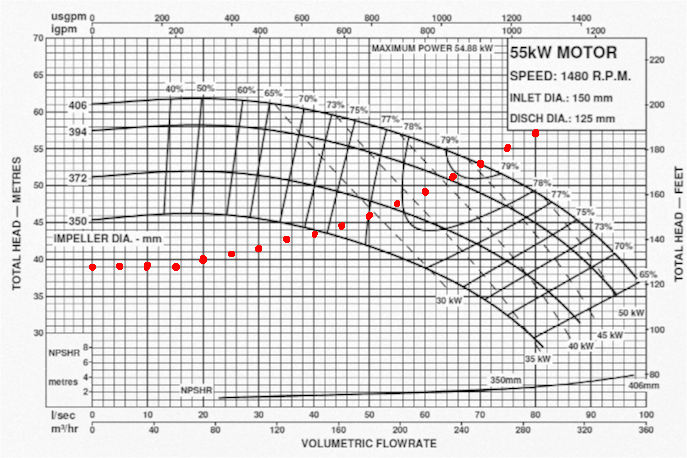

Estes cruzamentos geram os seguintes dados visualmente aproximados:

$$
\begin{array}{cccc}
\mathrm{Diam.\,[mm]} & Q \,\mathrm{[m^3/s]} & H_e \,\mathrm{[m]} & \eta\,\mathrm{[\%]} \\ \hline \hline
350 & 0,042 & 43,5 & 75,5\phantom{\,+}\\
372 & 0,054 & 47,0 & 77,5\phantom{\,+}\\
394 & 0,064 & 51,0 & 78,8\phantom{\,+}\\
406 & 0,070 & 53,0 & 79,0\,+\\ \hline
\end{array}
$$

### Questão 1 c)

Com os dados do exercício anterior, escolhe-se o diâmetro de $406\,\mathrm{mm}$, pois nele se tem a maior eficiência hidráulica.

### Questão 2)

Para resolver a questão 2 deve-se observar o diagrama a seguir:

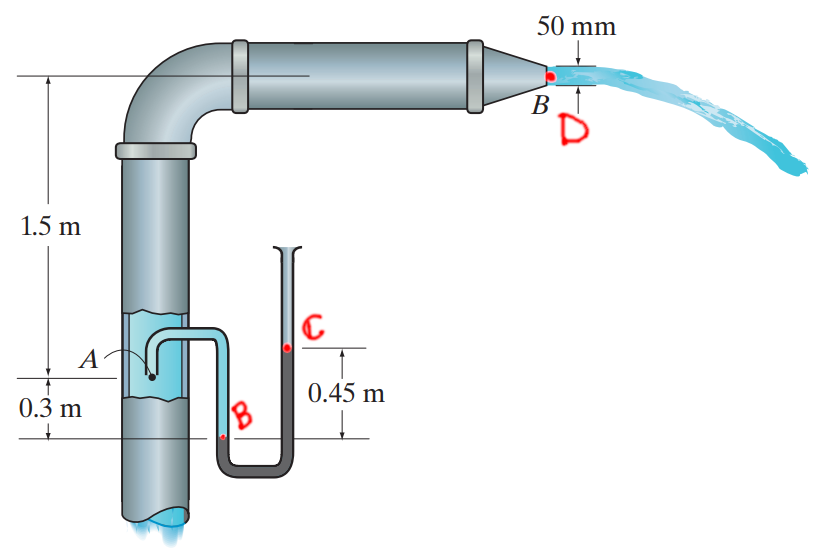

Tomaremos a elevação do ponto $B$ como referência. Assim, sabemos que, pelo princípio dos vasos comunicantes:

$$
p_B = p_A+\rho g \cdot 0,3\,\mathrm{m} = p_C + \rho_{Hg} g \cdot 0,45\,\mathrm{m}
$$

E o manômetro é aberto à atmosfera, de forma que $p_C = P_{atm}$.

Assim, sabemos que:

$$
p_A = P_{atm} + \rho_{Hg} g \cdot 0,45\,\mathrm{m} - \rho g \cdot 0,3\,\mathrm{m}
$$

O valor de $p_A$ é mostrado a seguir:

In [ ]:
%reset -f

Patm = 101300   # Pa
rho_hg = 13550  # kg/m³
rho = 998.37    # kg/m³
g = 9.81        # m/s²

Pa = Patm + rho_hg*g*0.45 - rho*g*0.3

print(f'Pa = {Pa:.2f} Pa')

Pa = 158178.27 Pa


No bocal, em $D$, o fluido possui velocidade $V_D$ e está à pressão atmosférica, $1,5\,\mathrm{m}$ acima do ponto $A$. No ponto $A$ há estagnação, e por isso a velocidade é zero. Assim, pode-se aplicar a equação de Bernoulli entre $A$ e $D$:

$$
\frac{p_A}{\rho} + \frac{v_A^2}{2} + g z_A = \frac{p_D}{\rho} + \frac{v_D^2}{2} + g z_D
$$

Substituindo os valores já conhecidos e adotando $z_A$ como referência de elevação:

$$
\frac{p_A}{\rho} = \frac{P_{atm}}{\rho}+\frac{v_D^2}{2} + g \cdot 1,5\,\mathrm{m}
$$

$$
\therefore \hspace{5mm} v_D = \sqrt{2\left(\frac{p_A-P_{atm}}{\rho}-g \cdot 1,5\,\mathrm{m}\right)}
$$

O valor da velocidade $v_D$ é encontrado a seguir:

In [ ]:
from numpy import sqrt

vd = sqrt(2*((Pa-Patm)/rho-1.5*g))

print(f'Vd = {vd:.2f} m/s')

Vd = 9.19 m/s
